In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetes = pd.read_csv('drive/MyDrive/diabetes-dataset.csv')
heart = pd.read_csv('drive/MyDrive/heart.csv')
spine = pd.read_csv('drive/MyDrive/Dataset_spine.csv')
cardiovascular = pd.read_csv('drive/MyDrive/cardio_train.csv')
cardiovascular.drop(columns=['id'], inplace=True)

# validating spine
proper_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
                'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
                'sacrum_angle', 'scoliosis_slope', 'Outcome']

curr_names = list(spine.columns)
for i in range(len(proper_names)):
    spine.rename(columns={curr_names[i]: proper_names[i]}, inplace=True)

spine['Outcome'].replace(['Abnormal', 'Normal'], [1, 0], inplace=True)
spine.drop(columns=['Unnamed: 13'], inplace=True)

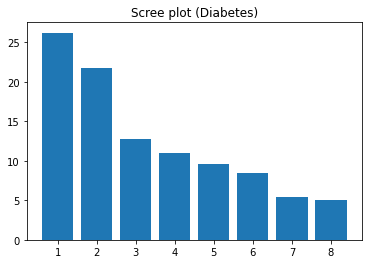

In [ ]:
# PCA and Scree plots for diabetes
vars_diabetes = diabetes.loc[:, diabetes.columns != 'Outcome']
target_diabetes = diabetes['Outcome']

scaled_data = StandardScaler().fit_transform(vars_diabetes)
pca = PCA()
pca.fit(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.title('Scree plot (Diabetes)')
plt.show()

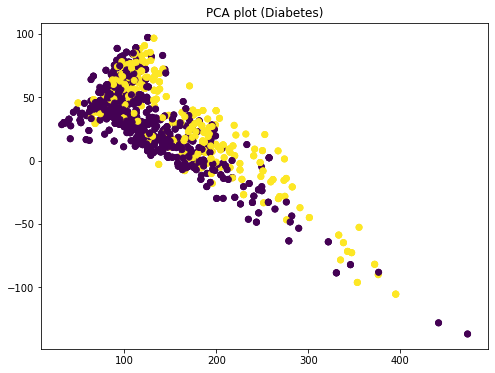

In [ ]:
pca_data = pca.transform(vars_diabetes)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=target_diabetes)
plt.title('PCA plot (Diabetes)')
plt.show()

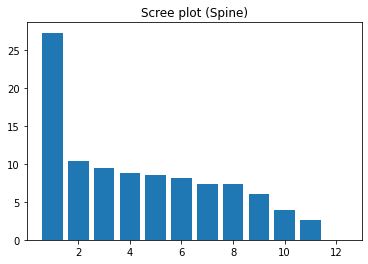

In [ ]:
# PCA and Scree plots for spine
vars_spine = spine.loc[:, spine.columns != 'Outcome']
target_spine = spine['Outcome']

scaled_data = StandardScaler().fit_transform(vars_spine)
pca = PCA()
pca.fit(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.title('Scree plot (Spine)')
plt.show()

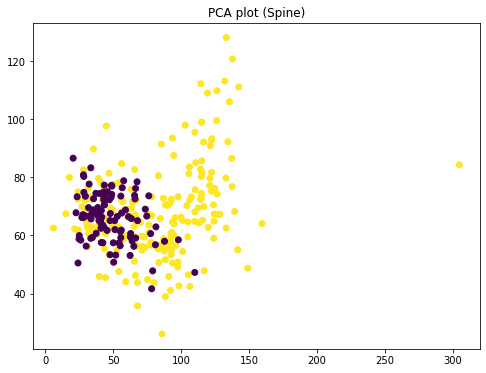

In [ ]:
pca_data = pca.transform(vars_spine)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=target_spine)
plt.title('PCA plot (Spine)')
plt.show()

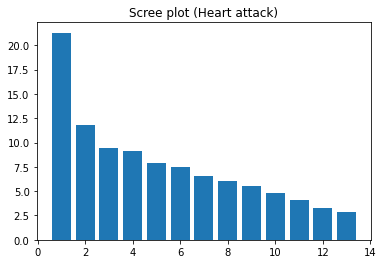

In [ ]:
# PCA and Scree plots for heart attack.
vars_heart = heart.loc[:, heart.columns != 'target']
target_heart = heart['target']

scaled_data = StandardScaler().fit_transform(vars_heart)
pca = PCA()
pca.fit(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.title('Scree plot (Heart attack)')
plt.show()

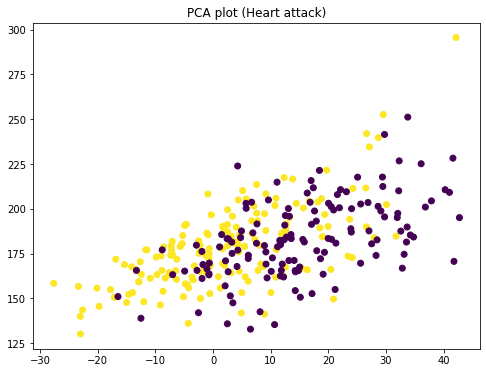

In [ ]:
pca_data = pca.transform(vars_heart)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=target_heart)
plt.title('PCA plot (Heart attack)')
plt.show()

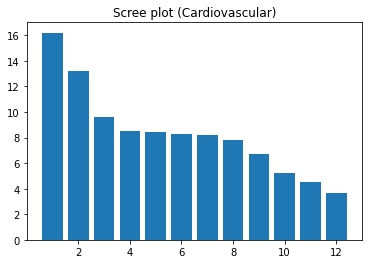

In [ ]:
# PCA and Scree plots for cardiovascular
vars_cardio = cardiovascular.loc[:, cardiovascular.columns != 'cardio']
target_cardio = cardiovascular['cardio']

scaled_data = StandardScaler().fit_transform(vars_cardio)
pca = PCA()
pca.fit(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.title('Scree plot (Cardiovascular)')

plt.show()

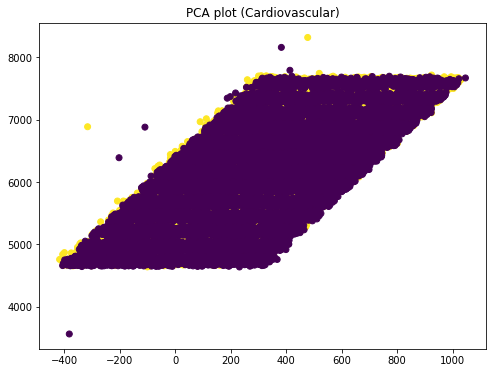

In [ ]:
pca_data = pca.transform(vars_cardio)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=target_cardio)
plt.title('PCA plot (Cardiovascular)')
plt.show()

In [ ]:
# Diabetes
x_train, x_test, y_train, y_test = train_test_split(vars_diabetes, target_diabetes)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

predicted = classifier.predict(x_test)
print('Accuracy: ', round(metrics.accuracy_score(y_test, predicted), 2))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, predicted))
print('F1 score: ', round(metrics.f1_score(y_test, predicted), 2))

Accuracy:  0.79
Confusion matrix:
 [[299  38]
 [ 68  95]]
F1 score:  0.64


In [ ]:
# Spine
x_train, x_test, y_train, y_test = train_test_split(vars_spine, target_spine)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

predicted = classifier.predict(x_test)
print('Accuracy: ', round(metrics.accuracy_score(y_test, predicted), 2))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, predicted))
print('F1 score: ', round(metrics.f1_score(y_test, predicted), 2))

Accuracy:  0.87
Confusion matrix:
 [[26  6]
 [ 4 42]]
F1 score:  0.89


In [ ]:
# Heart attack
x_train, x_test, y_train, y_test = train_test_split(vars_heart, target_heart)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

predicted = classifier.predict(x_test)
print('Accuracy: ', round(metrics.accuracy_score(y_test, predicted), 2))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, predicted))
print('F1 score: ', round(metrics.f1_score(y_test, predicted), 2))

Accuracy:  0.84
Confusion matrix:
 [[26  7]
 [ 5 38]]
F1 score:  0.86


In [ ]:
# Cardiovascular
x_train, x_test, y_train, y_test = train_test_split(vars_cardio, target_cardio, train_size=0.5)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

predicted = classifier.predict(x_test)
print('Accuracy: ', round(metrics.accuracy_score(y_test, predicted), 2))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, predicted))
print('F1 score: ', round(metrics.f1_score(y_test, predicted), 2))

Accuracy:  0.72
Confusion matrix:
 [[6991 2028]
 [2955 6026]]
F1 score:  0.71
